<a href="https://colab.research.google.com/github/BigDRod1/BigDRod1.github.io/blob/master/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

# Upload multiple CSV files
uploaded = files.upload()

# Load each uploaded file into a DataFrame
strategies = {}
for filename, content in uploaded.items():
    if filename.endswith('.csv'):
        strategies[filename] = pd.read_csv(filename)

# Display the names of the uploaded strategies
print("Uploaded strategies:")
for strategy_name in strategies.keys():
    print(f"- {strategy_name}")

Saving S1.csv to S1 (1).csv
Saving S6.csv to S6 (1).csv
Saving S7.csv to S7 (1).csv
Saving S8.csv to S8 (1).csv
Saving S9.csv to S9 (1).csv
Saving S10.csv to S10 (1).csv
Saving S12.csv to S12 (1).csv
Saving S14.csv to S14 (1).csv
Saving S15.csv to S15 (1).csv
Saving S17.csv to S17 (1).csv
Saving S18.csv to S18 (1).csv
Saving S19.csv to S19 (1).csv
Saving S20.csv to S20 (1).csv
Saving S21.csv to S21 (1).csv
Saving S22.csv to S22 (1).csv
Saving S23.csv to S23 (1).csv
Uploaded strategies:
- S1 (1).csv
- S6 (1).csv
- S7 (1).csv
- S8 (1).csv
- S9 (1).csv
- S10 (1).csv
- S12 (1).csv
- S14 (1).csv
- S15 (1).csv
- S17 (1).csv
- S18 (1).csv
- S19 (1).csv
- S20 (1).csv
- S21 (1).csv
- S22 (1).csv
- S23 (1).csv


In [4]:
import pandas as pd

# Create an empty DataFrame to store all the data
combined_df = pd.DataFrame()

# Loop through each strategy and extract 'Period' and 'Net profit'
for strategy_name, data in strategies.items():
    # Check if the required columns exist
    if 'Period' in data.columns and 'Net profit' in data.columns:
        # Extract the 'Period' and 'Net profit' columns
        temp_df = data[['Period', 'Net profit']].copy()
        # Rename the 'Net profit' column to include the strategy name
        temp_df.rename(columns={'Net profit': f'Net Profit ({strategy_name})'}, inplace=True)
        # Merge with the combined DataFrame on 'Period'
        if combined_df.empty:
            combined_df = temp_df
        else:
            combined_df = pd.merge(combined_df, temp_df, on='Period', how='outer')
    else:
        print(f"Warning: 'Period' or 'Net profit' column not found in {strategy_name}")

# Replace NaN values with 0
combined_df = combined_df.fillna(0)

# Convert 'Period' column to datetime and format as mm/dd/yyyy
combined_df['Period'] = pd.to_datetime(combined_df['Period'], format='%m/%d/%Y')

# Sort the DataFrame by 'Period' in ascending order
combined_df = combined_df.sort_values(by='Period')

# Reset the index (optional, for cleaner output)
combined_df = combined_df.reset_index(drop=True)

# Display the combined DataFrame
#print(combined_df)

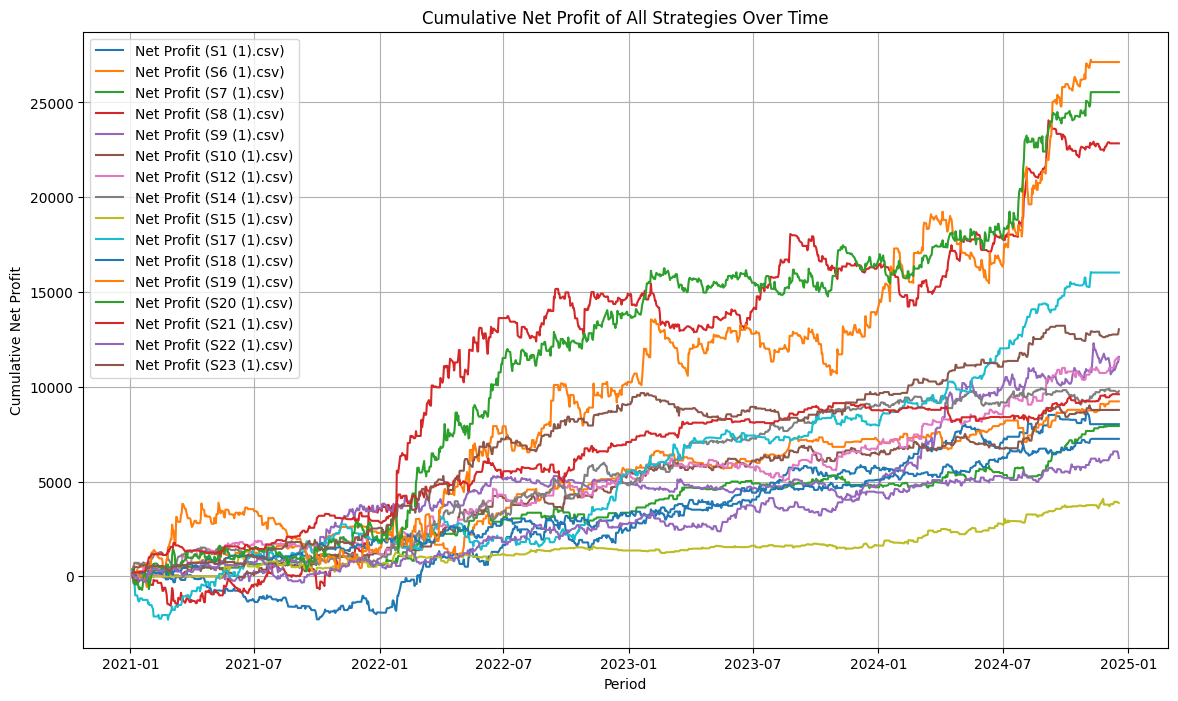

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of combined_df to avoid modifying the original DataFrame
combined_df_copy = combined_df.copy()

# Clean the data: Remove '$', ',', and convert parentheses to negative values
for column in combined_df_copy.columns:
    if column != 'Period':  # Skip the 'Period' column
        # Remove '$' and ','
        combined_df_copy[column] = combined_df_copy[column].replace('[\$,]', '', regex=True)
        # Convert numbers in parentheses to negative values
        combined_df_copy[column] = combined_df_copy[column].replace(r'\(([\d.]+)\)', r'-\1', regex=True)
        # Convert to numeric
        combined_df_copy[column] = pd.to_numeric(combined_df_copy[column], errors='coerce')

# Calculate cumulative net profit for each strategy
for column in combined_df_copy.columns:
    if column != 'Period':  # Skip the 'Period' column
        combined_df_copy[column] = combined_df_copy[column].cumsum()

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot each cumulative 'Net Profit' column
for column in combined_df_copy.columns:
    if column != 'Period':  # Skip the 'Period' column
        plt.plot(combined_df_copy['Period'], combined_df_copy[column], label=column)

# Add labels, title, and legend
plt.xlabel('Period')
plt.ylabel('Cumulative Net Profit')
plt.title('Cumulative Net Profit of All Strategies Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [6]:
# Create a copy of combined_df to avoid modifying the original DataFrame
combined_df_copy = combined_df.copy()

# Add 'Period' column if it doesn't exist
if 'Period' not in combined_df_copy.columns:
    combined_df_copy['Period'] = range(1, len(combined_df_copy) + 1)

# Clean the data: Remove '$', ',', and convert parentheses to negative values
for column in combined_df_copy.columns:
    if column != 'Period':  # Skip the 'Period' column
        # Remove '$' and ','
        combined_df_copy[column] = combined_df_copy[column].replace('[\$,]', '', regex=True)
        # Convert numbers in parentheses to negative values
        combined_df_copy[column] = combined_df_copy[column].replace(r'\(([\d.]+)\)', r'-\1', regex=True)
        # Convert to numeric
        combined_df_copy[column] = pd.to_numeric(combined_df_copy[column], errors='coerce')

# Set 'Period' as the index
combined_df_copy.set_index('Period', inplace=True)

# Calculate 'Daily PnL' as the sum of each row (excluding the 'Period' column since it's now the index)
combined_df_copy['Daily PnL'] = combined_df_copy.sum(axis=1)

# Display the DataFrame to verify the new column
combined_df_copy

,Net Profit (S1 (1).csv),Net Profit (S6 (1).csv),Net Profit (S7 (1).csv),Net Profit (S8 (1).csv),Net Profit (S9 (1).csv),Net Profit (S10 (1).csv),Net Profit (S12 (1).csv),Net Profit (S14 (1).csv),Net Profit (S15 (1).csv),Net Profit (S17 (1).csv),Net Profit (S18 (1).csv),Net Profit (S19 (1).csv),Net Profit (S20 (1).csv),Net Profit (S21 (1).csv),Net Profit (S22 (1).csv),Net Profit (S23 (1).csv),Daily PnL
Period,,,,,,,,,,,,,,,,,
2021-01-04,0.00,354.78,77.26,-35.24,0.00,0.00,-82.74,352.76,0.00,0.00,185.76,262.02,379.28,74.26,105.26,176.52,1849.92
2021-01-05,72.01,0.00,0.00,-184.48,0.00,0.00,0.00,103.76,0.00,-4.04,24.76,-143.74,-350.46,-147.24,0.00,97.01,-532.42
2021-01-06,79.51,173.26,0.00,-173.74,0.00,-161.74,0.00,133.76,0.00,-282.04,-17.74,0.00,-347.74,313.76,-132.74,0.00,-415.45
2021-01-07,-65.49,173.26,0.00,222.52,0.00,-61.74,52.76,124.76,0.00,-51.04,19.26,81.78,91.76,0.00,0.00,222.01,809.84
2021-01-08,-47.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-664.12,-151.74,0.00,-203.98,-36.24,0.00,0.00,-1104.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11,0.00,0.00,0.00,0.00,160.76,0.00,101.52,0.00,105.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,367.74
2024-12-12,0.00,0.00,0.00,0.00,-123.62,0.00,264.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,140.64
2024-12-16,0.00,0.00,0.00,0.00,407.92,0.00,169.52,-88.24,0.00,0.00,0.00,0.00,0.00,-3.74,0.00,0.00,485.46


In [7]:
# Calculate Cumulative Net Profit
combined_df_copy['Cumulative Net Profit'] = combined_df_copy['Daily PnL'].cumsum()

# Calculate Max Equity
combined_df_copy['Max Equity'] = combined_df_copy['Cumulative Net Profit'].cummax()

# Calculate Current Drawdown
combined_df_copy['Current Drawdown'] = combined_df_copy['Max Equity'] - combined_df_copy['Cumulative Net Profit']

# Display the DataFrame to verify the new columns
combined_df_copy

,Net Profit (S1 (1).csv),Net Profit (S6 (1).csv),Net Profit (S7 (1).csv),Net Profit (S8 (1).csv),Net Profit (S9 (1).csv),Net Profit (S10 (1).csv),Net Profit (S12 (1).csv),Net Profit (S14 (1).csv),Net Profit (S15 (1).csv),Net Profit (S17 (1).csv),Net Profit (S18 (1).csv),Net Profit (S19 (1).csv),Net Profit (S20 (1).csv),Net Profit (S21 (1).csv),Net Profit (S22 (1).csv),Net Profit (S23 (1).csv),Daily PnL,Cumulative Net Profit,Max Equity,Current Drawdown
Period,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.00,354.78,77.26,-35.24,0.00,0.00,-82.74,352.76,0.00,0.00,185.76,262.02,379.28,74.26,105.26,176.52,1849.92,1849.92,1849.92,0.00
2021-01-05,72.01,0.00,0.00,-184.48,0.00,0.00,0.00,103.76,0.00,-4.04,24.76,-143.74,-350.46,-147.24,0.00,97.01,-532.42,1317.50,1849.92,532.42
2021-01-06,79.51,173.26,0.00,-173.74,0.00,-161.74,0.00,133.76,0.00,-282.04,-17.74,0.00,-347.74,313.76,-132.74,0.00,-415.45,902.05,1849.92,947.87
2021-01-07,-65.49,173.26,0.00,222.52,0.00,-61.74,52.76,124.76,0.00,-51.04,19.26,81.78,91.76,0.00,0.00,222.01,809.84,1711.89,1849.92,138.03
2021-01-08,-47.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-664.12,-151.74,0.00,-203.98,-36.24,0.00,0.00,-1104.07,607.82,1849.92,1242.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11,0.00,0.00,0.00,0.00,160.76,0.00,101.52,0.00,105.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,367.74,197531.12,197531.12,0.00
2024-12-12,0.00,0.00,0.00,0.00,-123.62,0.00,264.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,140.64,197671.76,197671.76,0.00
2024-12-16,0.00,0.00,0.00,0.00,407.92,0.00,169.52,-88.24,0.00,0.00,0.00,0.00,0.00,-3.74,0.00,0.00,485.46,198157.22,198157.22,0.00


In [8]:
import numpy as np

# Calculate Trades Per Day: Number of strategies with non-zero values for each day
combined_df_copy['Trades Per Day'] = (combined_df_copy.iloc[:, :-4] != 0).sum(axis=1)  # Exclude 'Daily PnL', 'Cumulative Net Profit', 'Max Equity', 'Current Drawdown'

# Calculate metrics
metrics = {
    "Total Net Profit": round(combined_df_copy['Daily PnL'].sum(), 2),
    "Max Drawdown": round(combined_df_copy['Current Drawdown'].max(), 2),
    "Profitable Percentage": round((combined_df_copy['Daily PnL'] > 0).mean() * 100, 2),
    "Average Return Per Trade": round(combined_df_copy['Daily PnL'].mean(), 2),
    "Average Winning Trade": round(combined_df_copy[combined_df_copy['Daily PnL'] > 0]['Daily PnL'].mean(), 2),
    "Average Losing Trade": round(combined_df_copy[combined_df_copy['Daily PnL'] < 0]['Daily PnL'].mean(), 2),
    "Average Trades Per Day": round(combined_df_copy['Trades Per Day'].mean(), 2),
    "Profit Per Month": round(combined_df_copy['Daily PnL'].sum() / (len(combined_df_copy) / 30), 2),  # Approximate
    "Start Date": combined_df_copy.index.min(),
    "End Date": combined_df_copy.index.max(),
    "Worst Day": round(combined_df_copy['Daily PnL'].min(), 2),
    "Best Day": round(combined_df_copy['Daily PnL'].max(), 2),
    "Sharpe Ratio": round((combined_df_copy['Daily PnL'].mean() / combined_df_copy['Daily PnL'].std()) * np.sqrt(252), 2),
    "Sortino Ratio": round((combined_df_copy['Daily PnL'].mean() / combined_df_copy[combined_df_copy['Daily PnL'] < 0]['Daily PnL'].std()) * np.sqrt(252), 2),
    "Return to Drawdown Ratio": round(combined_df_copy['Daily PnL'].sum() / combined_df_copy['Current Drawdown'].max(), 2),
    "Standard Deviation of Returns": round(combined_df_copy['Daily PnL'].std(), 2),
    "Losing Days Standard Deviation": round(combined_df_copy[combined_df_copy['Daily PnL'] < 0]['Daily PnL'].std(), 2)
}

# Calculate Minimum and Recommended Capital
max_drawdown = combined_df_copy['Current Drawdown'].max()
worst_day = combined_df_copy['Daily PnL'].min()

minimum_capital = max_drawdown * 2
recommended_capital = max_drawdown * 2 + abs(worst_day)

# Add these metrics to the existing metrics dictionary
metrics["Minimum Capital"] = round(minimum_capital, 2)
metrics["Recommended Capital"] = round(recommended_capital, 2)

# Convert metrics to a DataFrame for better visualization
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Display the metrics dashboard
print(metrics_df)

                            Metric                Value
0                 Total Net Profit            198279.65
1                     Max Drawdown               5523.7
2            Profitable Percentage                51.88
3         Average Return Per Trade               181.74
4            Average Winning Trade               666.57
5             Average Losing Trade              -340.95
6           Average Trades Per Day                 7.99
7                 Profit Per Month              5452.24
8                       Start Date  2021-01-04 00:00:00
9                         End Date  2024-12-18 00:00:00
10                       Worst Day              -1997.2
11                        Best Day              5027.38
12                    Sharpe Ratio                 3.82
13                   Sortino Ratio                 9.64
14        Return to Drawdown Ratio                 35.9
15   Standard Deviation of Returns               755.19
16  Losing Days Standard Deviation              

In [9]:
import numpy as np
import pandas as pd

# Input: Number of Monte Carlo iterations
num_iterations = int(input("Enter the number of Monte Carlo iterations: "))

# Preserve the original data
original_df = combined_df_copy.copy()

# Initialize a list to store metrics for each iteration
all_metrics = []

# Monte Carlo Simulation
for i in range(num_iterations):
    # Shuffle the Daily PnL values
    shuffled_daily_pnl = original_df['Daily PnL'].sample(frac=1, replace=False).reset_index(drop=True)

    # Calculate Cumulative Net Profit
    cumulative_net_profit = shuffled_daily_pnl.cumsum()

    # Calculate metrics for this iteration
    metrics = {
        "Total Net Profit": round(shuffled_daily_pnl.sum(), 2),
        "Max Drawdown": round((cumulative_net_profit.cummax() - cumulative_net_profit).max(), 2) if len(cumulative_net_profit) > 0 else 0.0,
        "Profitable Percentage": round((shuffled_daily_pnl > 0).mean() * 100, 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Average Return Per Trade": round(shuffled_daily_pnl.mean(), 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Average Winning Trade": round(np.nanmean(shuffled_daily_pnl[shuffled_daily_pnl > 0]), 2),
        "Average Losing Trade": round(np.nanmean(shuffled_daily_pnl[shuffled_daily_pnl < 0]), 2),
        "Average Trades Per Day": round(original_df['Trades Per Day'].mean(), 2) if len(original_df) > 0 else 0.0,
        "Profit Per Month": round(shuffled_daily_pnl.sum() / (len(shuffled_daily_pnl) / 30), 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Worst Day": round(shuffled_daily_pnl.min(), 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Best Day": round(shuffled_daily_pnl.max(), 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Sharpe Ratio": round((shuffled_daily_pnl.mean() / np.nanstd(shuffled_daily_pnl)) * np.sqrt(252), 2) if np.nanstd(shuffled_daily_pnl) > 0 else np.nan,
        "Sortino Ratio": round((shuffled_daily_pnl.mean() / np.nanstd(shuffled_daily_pnl[shuffled_daily_pnl < 0])) * np.sqrt(252), 2) if len(shuffled_daily_pnl[shuffled_daily_pnl < 0]) > 0 else np.nan,
        "Return to Drawdown Ratio": round(shuffled_daily_pnl.sum() / (cumulative_net_profit.cummax() - cumulative_net_profit).max(), 2) if len(cumulative_net_profit) > 0 else np.nan,
        "Standard Deviation of Returns": round(np.nanstd(shuffled_daily_pnl), 2) if len(shuffled_daily_pnl) > 0 else 0.0,
        "Losing Days Standard Deviation": round(np.nanstd(shuffled_daily_pnl[shuffled_daily_pnl < 0]), 2) if len(shuffled_daily_pnl[shuffled_daily_pnl < 0]) > 0 else np.nan
    }

    # Calculate Minimum and Recommended Capital
    max_drawdown = (cumulative_net_profit.cummax() - cumulative_net_profit).max()
    worst_day = shuffled_daily_pnl.min()

    minimum_capital = max_drawdown * 2 if max_drawdown > 0 else 0.0
    recommended_capital = max_drawdown * 2 + abs(worst_day) if max_drawdown > 0 else abs(worst_day)

    # Add these metrics to the existing metrics dictionary
    metrics["Minimum Capital"] = round(minimum_capital, 2)
    metrics["Recommended Capital"] = round(recommended_capital, 2)

    # Store metrics for this iteration
    all_metrics.append(metrics)

# Calculate average, best, and worst metrics across all iterations
average_metrics = {metric: np.nanmean([iteration[metric] for iteration in all_metrics]) for metric in all_metrics[0].keys()}
best_metrics = {metric: np.nanmax([iteration[metric] for iteration in all_metrics]) for metric in all_metrics[0].keys()}
worst_metrics = {metric: np.nanmin([iteration[metric] for iteration in all_metrics]) for metric in all_metrics[0].keys()}

# Create a DataFrame to display metrics in the desired format
metrics_df = pd.DataFrame({
    'Metric': list(average_metrics.keys()),
    'Average': list(average_metrics.values()),
    'Max': list(best_metrics.values()),
    'Min': list(worst_metrics.values())
})

# Display the metrics DataFrame
print("Metrics Across All Iterations:")
metrics_df

Enter the number of Monte Carlo iterations: 100
Metrics Across All Iterations:


,Metric,Average,Max,Min
0,Total Net Profit,198279.6500,198279.65,198279.65
1,Max Drawdown,5917.7778,12381.25,3907.47
2,Profitable Percentage,51.8800,51.88,51.88
3,Average Return Per Trade,181.7400,181.74,181.74
4,Average Winning Trade,666.5700,666.57,666.57
5,Average Losing Trade,-340.9500,-340.95,-340.95
6,Average Trades Per Day,7.9900,7.99,7.99
7,Profit Per Month,5452.2400,5452.24,5452.24
8,Worst Day,-1997.2000,-1997.20,-1997.20
9,Best Day,5027.3800,5027.38,5027.38


In [1]:
import numpy as np
import pandas as pd
from itertools import product
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count

# Define all possible metrics with numbering
all_metrics_list = [
    "Total Net Profit", "Max Drawdown", "Profitable Percentage", "Average Return Per Trade",
    "Average Winning Trade", "Average Losing Trade", "Average Trades Per Day", "Profit Per Month",
    "Worst Day", "Best Day", "Sharpe Ratio", "Sortino Ratio", "Return to Drawdown Ratio",
    "Standard Deviation of Returns", "Losing Days Standard Deviation", "Minimum Capital", "Recommended Capital"
]

# Display all possible metrics with numbers
print("Available Metrics for Optimization:")
for i, metric in enumerate(all_metrics_list, 1):
    print(f"{i}. {metric}")

# Get the list of strategies (columns) dynamically
# Strategies are columns that start with "Net Profit"
strategies = [col for col in original_df.columns if col.startswith("Net Profit")]

# Display the number of recognized strategies
print(f"\nNumber of strategies recognized: {len(strategies)}")
print("Strategies:", strategies)

# Get user inputs with error handling
try:
    min_weight = int(input("Enter the minimum weight (integer): "))
    if min_weight < 0:
        raise ValueError("Minimum weight cannot be less than 0.")

    max_weight = int(input("Enter the maximum weight (integer): "))
    if max_weight < min_weight:
        raise ValueError("Maximum weight must be greater than or equal to the minimum weight.")

    num_monte_carlo_iterations = int(input("Enter the number of Monte Carlo iterations per weight combination: "))
    if num_monte_carlo_iterations <= 0:
        raise ValueError("Number of Monte Carlo iterations must be greater than 0.")

    selected_metric_number = int(input("Enter the number of the metric to optimize: "))
    if selected_metric_number < 1 or selected_metric_number > len(all_metrics_list):
        raise ValueError(f"Invalid metric number. Please choose a number between 1 and {len(all_metrics_list)}.")

    optimize_for = input("Optimize for 'min' or 'max' value? (min/max): ").strip().lower()
    if optimize_for not in ["min", "max"]:
        raise ValueError("Invalid optimization target. Please choose 'min' or 'max'.")

except ValueError as e:
    print(f"Input error: {e}")
    exit()

# Map the selected number to the metric name
selected_metric = all_metrics_list[selected_metric_number - 1]

# Generate all possible weight combinations
weight_range = range(min_weight, max_weight + 1)  # Integer weights from min_weight to max_weight
weight_combinations = list(product(weight_range, repeat=len(strategies)))

# Calculate total weight combinations and iterations
num_weight_combinations = len(weight_combinations)
total_iterations = num_weight_combinations * num_monte_carlo_iterations
print(f"\nTotal weight combinations: {num_weight_combinations}")
print(f"Total iterations to run: {total_iterations}")
confirm = input("Do you want to continue? (yes/no): ").strip().lower()

if confirm != "yes":
    print("Optimization canceled.")
    exit()

# Function to evaluate a single weight combination
def evaluate_weights(weights):
    # Apply weights to each strategy's Daily PnL using vectorized operations
    weighted_pnl = original_df[strategies].values * np.array(weights)
    weighted_daily_pnl = weighted_pnl.sum(axis=1)

    # Generate all Monte Carlo iterations at once
    shuffled_indices = np.random.permutation(np.tile(np.arange(len(weighted_daily_pnl)), num_monte_carlo_iterations))
    shuffled_daily_pnl = weighted_daily_pnl[shuffled_indices].reshape(num_monte_carlo_iterations, -1)

    # Calculate Cumulative Net Profit for all iterations
    cumulative_net_profit = np.cumsum(shuffled_daily_pnl, axis=1)

    # Calculate Max Drawdown for all iterations
    max_drawdown = (np.maximum.accumulate(cumulative_net_profit, axis=1) - cumulative_net_profit).max(axis=1)

    # Calculate metrics for all iterations
    total_net_profit = shuffled_daily_pnl.sum(axis=1)
    profitable_percentage = (shuffled_daily_pnl > 0).mean(axis=1) * 100
    average_return_per_trade = shuffled_daily_pnl.mean(axis=1)
    average_winning_trade = np.array([np.nanmean(shuffled_daily_pnl[i][shuffled_daily_pnl[i] > 0]) for i in range(num_monte_carlo_iterations)])
    average_losing_trade = np.array([np.nanmean(shuffled_daily_pnl[i][shuffled_daily_pnl[i] < 0]) for i in range(num_monte_carlo_iterations)])
    worst_day = shuffled_daily_pnl.min(axis=1)
    best_day = shuffled_daily_pnl.max(axis=1)
    sharpe_ratio = (shuffled_daily_pnl.mean(axis=1) / np.nanstd(shuffled_daily_pnl, axis=1)) * np.sqrt(252)
    sortino_ratio = (shuffled_daily_pnl.mean(axis=1) / np.nanstd(np.where(shuffled_daily_pnl < 0, shuffled_daily_pnl, np.nan), axis=1)) * np.sqrt(252)
    return_to_drawdown_ratio = total_net_profit / max_drawdown
    std_dev_returns = np.nanstd(shuffled_daily_pnl, axis=1)
    losing_days_std_dev = np.nanstd(np.where(shuffled_daily_pnl < 0, shuffled_daily_pnl, np.nan), axis=1)
    minimum_capital = max_drawdown * 2
    recommended_capital = max_drawdown * 2 + np.abs(worst_day)

    # Calculate average metric for this weight combination
    avg_metric_value = np.nanmean(total_net_profit if selected_metric == "Total Net Profit" else
                                  max_drawdown if selected_metric == "Max Drawdown" else
                                  profitable_percentage if selected_metric == "Profitable Percentage" else
                                  average_return_per_trade if selected_metric == "Average Return Per Trade" else
                                  average_winning_trade if selected_metric == "Average Winning Trade" else
                                  average_losing_trade if selected_metric == "Average Losing Trade" else
                                  worst_day if selected_metric == "Worst Day" else
                                  best_day if selected_metric == "Best Day" else
                                  sharpe_ratio if selected_metric == "Sharpe Ratio" else
                                  sortino_ratio if selected_metric == "Sortino Ratio" else
                                  return_to_drawdown_ratio if selected_metric == "Return to Drawdown Ratio" else
                                  std_dev_returns if selected_metric == "Standard Deviation of Returns" else
                                  losing_days_std_dev if selected_metric == "Losing Days Standard Deviation" else
                                  minimum_capital if selected_metric == "Minimum Capital" else
                                  recommended_capital)

    return weights, avg_metric_value, {
        "Total Net Profit": np.nanmean(total_net_profit),
        "Max Drawdown": np.nanmean(max_drawdown),
        "Profitable Percentage": np.nanmean(profitable_percentage),
        "Average Return Per Trade": np.nanmean(average_return_per_trade),
        "Average Winning Trade": np.nanmean(average_winning_trade),
        "Average Losing Trade": np.nanmean(average_losing_trade),
        "Worst Day": np.nanmean(worst_day),
        "Best Day": np.nanmean(best_day),
        "Sharpe Ratio": np.nanmean(sharpe_ratio),
        "Sortino Ratio": np.nanmean(sortino_ratio),
        "Return to Drawdown Ratio": np.nanmean(return_to_drawdown_ratio),
        "Standard Deviation of Returns": np.nanmean(std_dev_returns),
        "Losing Days Standard Deviation": np.nanmean(losing_days_std_dev),
        "Minimum Capital": np.nanmean(minimum_capital),
        "Recommended Capital": np.nanmean(recommended_capital)
    }

# Initialize variables to store the best results
best_metric_value = np.inf if optimize_for == "min" else -np.inf
best_weights = None
best_metrics = None

# Use multiprocessing to parallelize the evaluation of weight combinations
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap(evaluate_weights, weight_combinations), total=num_weight_combinations, desc="Running Optimization", unit="weight combination"))

# Find the best result
for weights, avg_metric_value, metrics in results:
    if (optimize_for == "min" and avg_metric_value < best_metric_value) or \
       (optimize_for == "max" and avg_metric_value > best_metric_value):
        best_metric_value = avg_metric_value
        best_weights = weights
        best_metrics = metrics

# Display the best results with clear explanations
print("\nOptimization Results:")
print("The following results are the **best optimized average results** from the Monte Carlo simulations.")
print("These metrics are averaged across all iterations for the best weight combination.")

# Display only strategy names with weights
strategy_names = [col.replace("Net Profit (", "").replace(")", "") for col in strategies]
print(f"\nBest Weights: {dict(zip(strategy_names, best_weights))}")
print(f"Best {selected_metric} ({optimize_for}): {best_metric_value}")

# Display all metrics for the best weight combination
print("\nMetrics for Best Weighting Combination:")
metrics_df = pd.DataFrame(list(best_metrics.items()), columns=['Metric', 'Average Value'])
print(metrics_df)

Available Metrics for Optimization:
1. Total Net Profit
2. Max Drawdown
3. Profitable Percentage
4. Average Return Per Trade
5. Average Winning Trade
6. Average Losing Trade
7. Average Trades Per Day
8. Profit Per Month
9. Worst Day
10. Best Day
11. Sharpe Ratio
12. Sortino Ratio
13. Return to Drawdown Ratio
14. Standard Deviation of Returns
15. Losing Days Standard Deviation
16. Minimum Capital
17. Recommended Capital


NameError: name 'original_df' is not defined